# Л1: Задачи NLP (Natural Language Processing) через простой интерфейс 🗞️

В данной лабораторной работе вы познакомитесь с библиотекой **Transformers**. Она предоставляет API и простые инструменты для загрузки и использования предобученных моделей с ресурса [Hugging Face](https://huggingface.co/models).

- Оффициальная документация Transformers: https://huggingface.co/docs/transformers/main/en/index
- Описание и пример использования на Хабре: https://habr.com/ru/articles/704592/ 


**NLP (natural language processing)**, или обработка естественного языка, — это область искусственного интеллекта, задача которой состоит в том, чтобы научить компьютер (*машину*) понимать и обрабатывать естественный язык, на котором говорят и рассуждают люди. Примером может служить GPT-модели, такие как GPT-4, Claude 3 и др.

## 1/ Подготовка среды выполнения
На данной этапе вам наобходимо подготовить виртуальное окружение и установить все необходимые библиотеки.

1. Создать и активировать (или только активировать, если ранне создавали) виртуальной окружение `python`.

В терминале вводим следующие команды команды:

*создаем виртуальное окружение с помощью `python-venv`*
```
python -m venv env
```
*активируем виртуальное окружение*
```
env\Scripts\activate
```
**Примечание.** `env` - это название вашего виртуального окружения, назвать его можете как угодно.

После этого можем выбрать наш локальный интерпрететор pyhton, нажав на кнопку выше "Select kernel".

2. Устанавливаем все необходимые библиотеки

**Примечание.** Библиотеки установятся в ваше виртуальное окружение.

Нам понадобиться библиотека Transformers и PyTorch:

```
pip install transformers
pip install torch
```
Также нам подобиться библиотека Gradio для создания web-приложения.
```
pip install gradio
```

## 2/ Выбор и загрузка модели
В данной лабораторной работе в качестве примера предлагается выполнить задачу обобщения текста - **summarization** с помощью одной из предобученных NLP-моделей глубокого обучения с Hugging Face. 

Библиотека `transformers` содержит интерфейс `pipeline`, позволяющий сразу использовать модель на заданных входных данных. Это конвеййр, скрывающий под собой процесс загрузки и подготовки модели. Выглядит все очень просто!

Первым делом импортируем модуль `pipline` из библиотеки `transformers`.

*Выполните следюущий блок кода, нажав на треугольник слева от блока.*

In [ ]:
from transformers import pipeline

Теперь создадим `pipeline` для задачи summarization.

In [ ]:
model = pipeline("summarization")

После запуска пойдет процесс загрузки и кэширования модели. А какой модели? Как видите, при создании конвейера pipeline в параметрах мы указали только задачу (**task**) summarization и явно не указали какую модель глубокого обучения мы намерены использовать. В этом случае библиотека `transformers` выберем и загрузит **модель по умолчанию** для этой задачи. *В целом, это не рекомендуется, но делать можно*.

Теперь мы немедленно можем запустить нашу модель через `pipeline`. Для этого подготовим входные данные. Нам нужен какой-то текст, возможно абзац из научной статьи. Возьмем для примера первый абзац из раздела Introduction статьи [Convolutional Neural Networks for Autonomous UAV Navigation in GPS-Denied Environments](https://link.springer.com/chapter/10.1007/978-3-031-63851-0_7)

In [9]:
input_text = ("""The usage of Unmanned Aerial Vehicles (UAVs) is predicted to be indispensable in future Smart 
              Cities to provide services such as aerial delivery services (for instance medications or organs 
              for transplantation) [1], infrastructure inspection (allowing to inspect places where a human cannot
               see, like damage monitoring on bridges, buildings, etc.) [2] and first responder services (after a 
              natural disaster, for instance) [3]. Additionally, due to their maneuverability and rapid deployment, 
              these types of vehicles are operating in a variety of applications, for instance search and rescue [4],
               telecommunications [5], wild-fire detection [6] and agriculture [7]. Nonetheless, currently available 
              UAVs encounter technical hurdles, including cybersecurity risks, concerns about privacy, and issues 
              related to public safety [8]. Additionally, they lack the necessary autonomy to execute complex tasks 
              independently and heavily depend on the Global Positioning System (GPS) for navigation. While GPS 
              offers reliable accuracy in outdoor environments, it becomes ineffective in indoor and densely urban 
              areas due to possible signal obstructions. Consequently, alternative methods must be employed to control
               UAVs in such environments.""")

Вызовем наш конвейер `model` и в аргумент пошлем данный текст. Результат работы сохраним в переменную `out`.

In [7]:
out = model(input_text)

Выведем на экран результат

In [ ]:
out

Как видите, в ответ мы получили массив из одного элемента, в которой содержиться словарь, и по ключу `summary_text` мы можем получить резюме (сокращение) нашего входного абзаца из научно статьи. Давайте извлечем его и выведем на экран:

In [ ]:
print(out[0]['summary_text'])

Теперь пойдем дальше и выберем конкретную модель глубокого обучения для задачи summarization на Hugging Face в раздаеле Models https://huggingface.co/models. Слева вы увидите вильтрацию по задача. Найдите блок Natural Language Processing и выберете задачу Summarization.

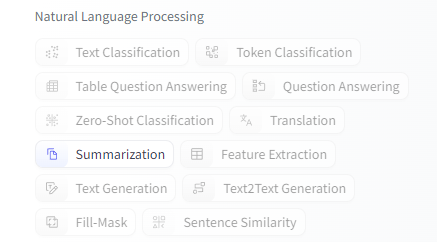

Вывалиться список моделей для данной задачи. Для примера выберем популярную на данный момент `facebook/bart-large-cnn` https://huggingface.co/facebook/bart-large-cnn. Откроется страница с описанием и примером кода.

У большинства моделей на странице описания сверху присутствует кнопка "Use this model". Нажва на нее и выбрав интерйес Transformer откроется шаблок кода для импорта этой модели в ваш проект. 

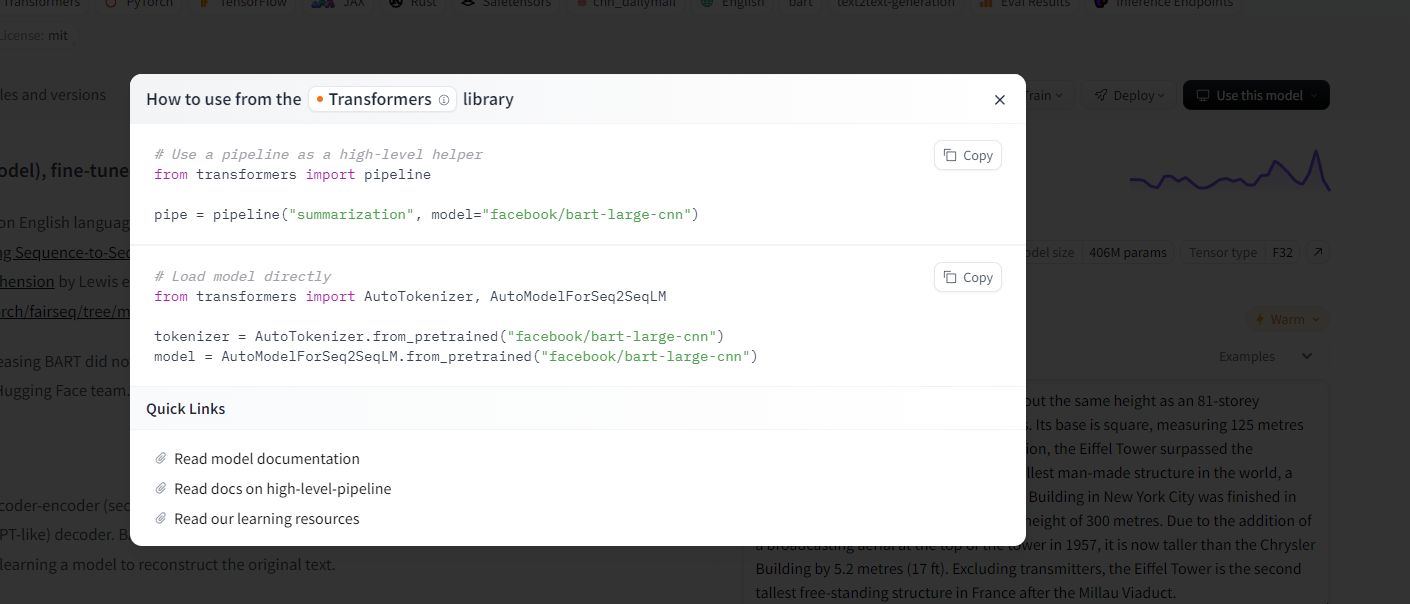

Скопируем строку с созданием pipeline этой модели. Строку с импортом копировать не нужно, так как мы уже импортировали библиотеку выше. Как можете увидеть, здесь явно прописывается используемая модель глубокого обучения. Запустим блока кода ниже и загрузим модель. Это займет некоторое время...

In [22]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")

Протестируем новую модель на том же тексте из научной статьи.

In [23]:
out1 = pipe(input_text)

Выведем результат работы модели:

In [ ]:
print(out1[0]['summary_text'])

Теперь вы можете поэксперементировать с двумя моделями (по умолчанию и facebook/bart-large-cnn) на разных входный данных. Попробуйте подать на вход текст на английском языке. **Сделайте несколько экспериментов и зафиксируйте результаты в отчет**.

In [ ]:
text_en = (""" """) # придумайте или скопируйте текст
ans1 = model(text_en) # запустите модель по умолчанию
ans2 = pipe(text_en) # запустите модель от facebook

Пример с текстом на русском языке. Возьмем отрывок из книги Геродот "История" про начало конфликта Эллады и Трои.

In [28]:
text_ru = ("""Затем в следующем поколении, говорят они, Александр, сын Приама, который слышал 
               об этом похищении, пожелал умыканием добыть для себя женщину из Эллады. Он был 
               твердо уверен, что не понесет наказания, так как и эллины тогда ничем не поплатились.
                После того как Александр таким образом похитил Елену, эллины сначала решили отправить
                посланцев, чтобы возвратить Елену и потребовать пени за похищение. Троянцы же в ответ
                бросили им упрек в похищении Медеи. Тогда ведь, говорили они, сами эллины не дали никакой
                пени и не возвратили Медеи, а теперь вот требуют пени от других.""")

Запустим модель по умолчанию:

In [ ]:
model(text_ru)

Запустим модель от facebook:

In [ ]:
pipe(text_ru)

Как видим, результаты работы этих моделей больше похожи на какой-то мусор... Это связано с тем, что данные модели глубокого обучения обучены на English. Для выбора модели на Russian при поиске модели мы можем отфильтровать по используемому языку.

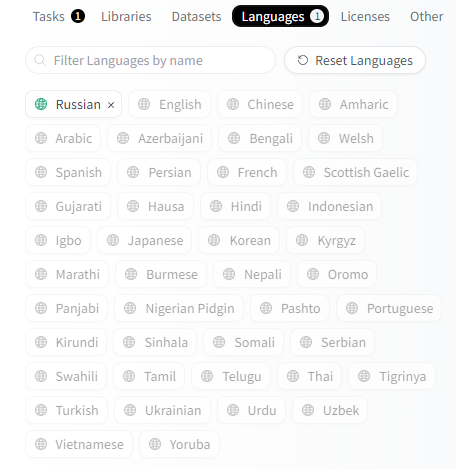

## 3/ Создание WEB-приложения с помощью `gradio`
Теперь мы модем создать простое графической web-приложение с помощью python библиотеки `gradio`. **В этом и состоит ваше основное задание.** 

Создайте новый Jupyter Notebook или Python Script, в котором будете писать код вашего приложения. В новый файл импортируйте библиотеку Transformer, как это было сделано выше

### Начало работы с Gradio `gr.Interface`
В руководстве по быстрому старту на сайте https://www.gradio.app/guides/quickstart есть шаблон кода:

```python
import gradio as gr

def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
    title="Text summarization with AI"
)

demo.launch()
```

Его мы возьмем за основу. Здесь нам нужно будет изменить класс `Interface`, оставив только текстовые блоки для входных (параметр `inputs`) и выходных данных (параметр `outputs`), потому что мы работаем с текстом. 

#### gr.Interface()
- Обратите внимание, что в данном примере мы передаем список `[]` в `inputs` и `outputs`, потому что функция `fn` (в данном случае `greet()`) может принимать более одного входного сигнала и возвращать более одного выходного сигнала.
- Количество объектов, передаваемых в список `inputs`, должно соответствовать количеству параметров, которые принимает функция `fn`, а количество объектов, передаваемых в список `outputs`, должно соответствовать количеству объектов, возвращаемых функцией `fn`.
- в параметр `title` можно вписать название вашего приложения

Фунция `greet` выполняет обработку текста, полученного с входного текстового блока и также возвращает текст, который помещается в выходной блок текста приложения. Именно в эту функцию вам следует разместить модель глубокого обучения, созданную через интерфейс `pipeline`. Для начала определимся с моделью. Для задания необходимо также выбрать модель для задачи обобщения текста summarization, но работающую с русским языком. **Самостоятельно выберете любую модель на Hugging Face, понимающую русский язык, создайте для нее `pipeline`.** 

У вас должно получится что-то близкое:
```python
# Use a pipeline as a high-level helper
from transformers import pipeline

model = pipeline("<task>", model="<model>")
```

Теперь вы можете вставать ваш pipeline модели в функции `greet` приложения gradio. Должно быть примерно так:

```python
def greet(text):
    out = model(text)
    return out[0]['summary_text']
```
Не забываем, что pipeline возвращает "сложную" переменную, из которой текст нужно правильно "вытянуть".

Если вы все сделали правильно, то ваше приложение готово к запуску. Запустите ваш код
- если работали в Jupiter Notebook запустить соответствующий блок кода
- если создавали Python Script то запустите выполнение в командной строке с активированным виртуальным окружением
```
python file.py
```
Если код запустился без ошибок, то вам будет доступна локальная ссылка на web-интерфейс. 

*Увидите такой вывод*
```
Running on local URL:  http://127.0.0.1:7860
```

Если вызвать `demo.launch()` с параметром `share=True`, то есть `demo.launch(share=True)`, это позволит вам создать общедоступную ссылку, которой вы сможете поделиться со своей командой или друзьями. Ссылка действительна в течении 72 часов. Тогда в выводе будет предложена вторая ссылка, которая будет уже публичной.

## Форма отчетности
В качестве отчета по лабораторной работе вам необходимо предоставить:
1. Резульататы тестирования модели на различных входных текстах (см. выше). **Не меньше трех вариантов**. Это могут быть скриншоты или код
2. Файл с кодом вашего приложения (Python Script или Jupyter Nonebook)
3. Скриншот работы графического web-интерфейса вашего приложения

Отчет разместить на **moodle**